In [1]:
# Kerakli kutubxonalarni chaqirib olamiz
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [8]:
def k_means(X, k, max_iters=100):
    # Tasodifiy markaz nuqtalarini tanlash
    centroids = X[np.random.choice(range(len(X)), k, replace=False)]

    for _ in range(max_iters):
        # Tanlanmadagi har bir nuqtani eng yaqin markazga biriktirish
        labels = np.argmin(np.linalg.norm(X - centroids[:, np.newaxis], axis=2), axis=0)

        # Har bir klasterga tayinlangan ma'lumotlar nuqtalarining o‘rtacha ko‘rsatkichlari asosida centroidlarni yangilash
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])

        # Konvergentsiyani tekshiring
        if np.all(centroids == new_centroids):
            break

        centroids = new_centroids

    return labels, centroids

# Na'munaviy ma'lumotlar to‘plamini generatsiya qilish
np.random.seed(42)
data_points = np.random.rand(100, 2)

# Klasterlar sonini belgilash (k)
k_clusters = 3

# K-Means algoritmini ishga tushirish
cluster_labels, final_centroids = k_means(data_points, k_clusters)

# Natijani chop etish
print("Klasterlar:", cluster_labels)
print("Yakuniy markaziy nuqtalar:", final_centroids)


Klasterlar: [1 0 2 1 0 1 0 2 1 2 2 2 1 1 2 2 1 0 2 0 1 1 1 1 2 0 0 0 2 2 2 0 1 1 1 0 1
 0 2 2 0 2 2 0 0 1 0 0 2 2 1 1 0 1 2 2 0 0 0 0 0 2 2 0 1 2 2 0 0 1 0 2 2 0
 2 0 1 0 0 1 1 0 1 2 1 2 2 2 0 0 2 0 1 0 2 1 0 2 0 0]
Yakuniy markaziy nuqtalar: [[0.8039633  0.57026999]
 [0.18520943 0.72228065]
 [0.36376248 0.20008043]]


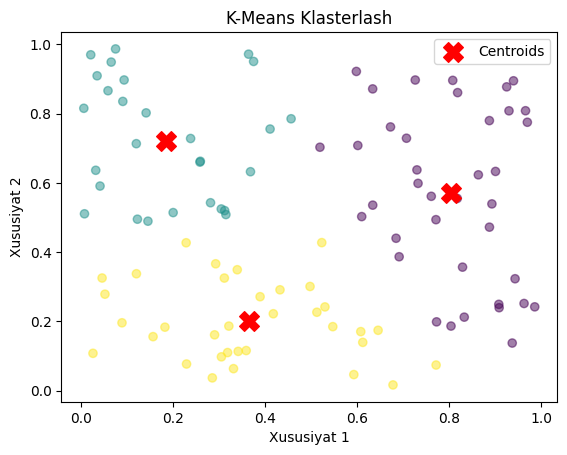

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Natijani grafik ko‘rinishda chop etish
plt.scatter(data_points[:, 0], data_points[:, 1], c=cluster_labels, cmap='viridis', alpha=0.5)
plt.scatter(final_centroids[:, 0], final_centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('K-Means Klasterlash')
plt.xlabel('Xususiyat 1')
plt.ylabel('Xususiyat 2')
plt.legend()
plt.show()


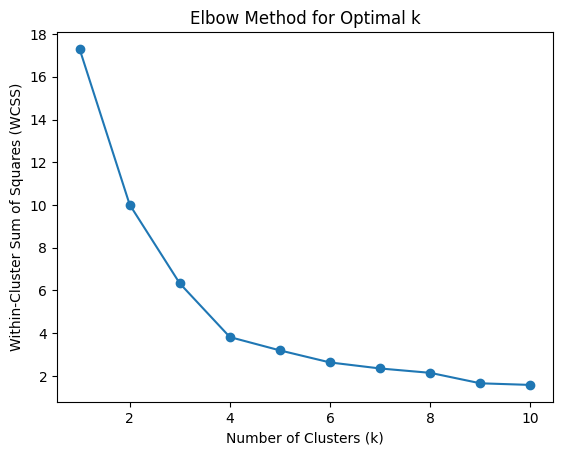

In [11]:
def calculate_wcss(X, centroids, labels):
    wcss = np.sum([np.sum((X[labels == i] - centroids[i])**2) for i in range(len(centroids))])
    return wcss

# Elbow metodi yordamida k ning optimal qiymatini aniqlash
wcss_values = []
possible_k_values = range(1, 11)

for k in possible_k_values:
    _, final_centroids = k_means(data_points, k)
    labels = np.argmin(np.linalg.norm(data_points - final_centroids[:, np.newaxis], axis=2), axis=0)
    wcss = calculate_wcss(data_points, final_centroids, labels)
    wcss_values.append(wcss)

# Elbow metodi grafigini chizish
plt.plot(possible_k_values, wcss_values, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()
